In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
import pandas as pd
df = pd.read_csv('customer churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# REPLACING THE BLANKS WITH 0 AS TENURE IS 0 AND NO TOTAL CHARGES ARE RECORDED.

In [96]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum() # this will shows us that we have zero null values. if we add sum one more time then it returns

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [11]:
# check duplicates on basis of special id number
df["customerID"].duplicated().sum()

np.int64(0)

In [12]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

# here we convert 0 and 1 value of senior citizen in yes/no to make it easier to understand.

In [13]:
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


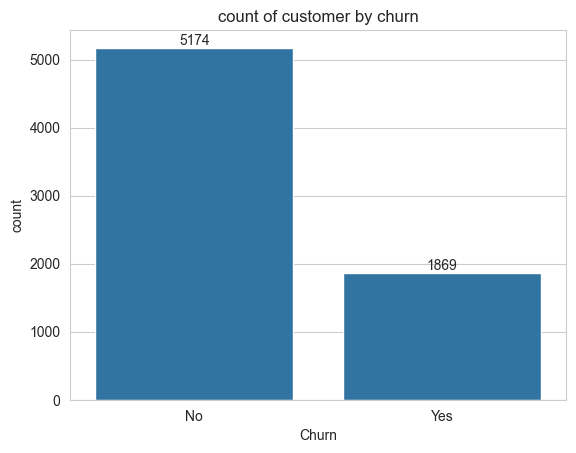

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x = df["Churn"], data = df)
ax.bar_label(ax.containers[0]) # this statement for showing the exact value of yes/no.
plt.title("count of customer by churn")
plt.show()

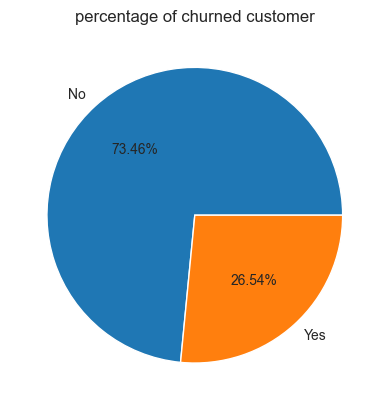

In [16]:
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct= "%1.2f%%")
plt.title("percentage of churned customer")
plt.show()

# from the given piechart we conclude that 26.54% of our customers have churned out.
now let's explore the reason behind it.

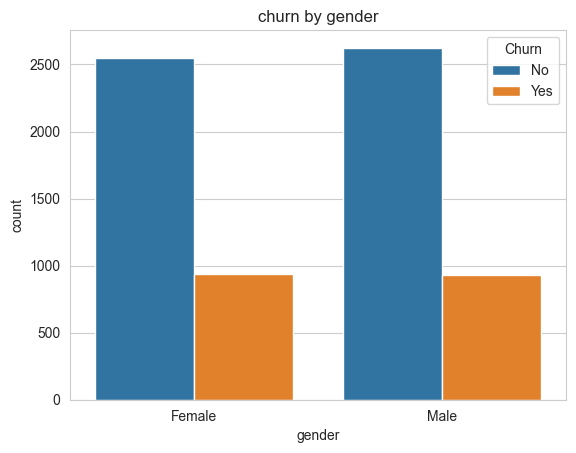

In [33]:
# now we check on basis of gender
# this is not gender specific.
sns.countplot(x = "gender" , data = df , hue = "Churn")
plt.title("churn by gender")
plt.show() # by hue we can see both yes or no in same plot

# we can also change the figure size by -----plt.figure(figsize(4,4))-----

# this code is from ai(perplexity)

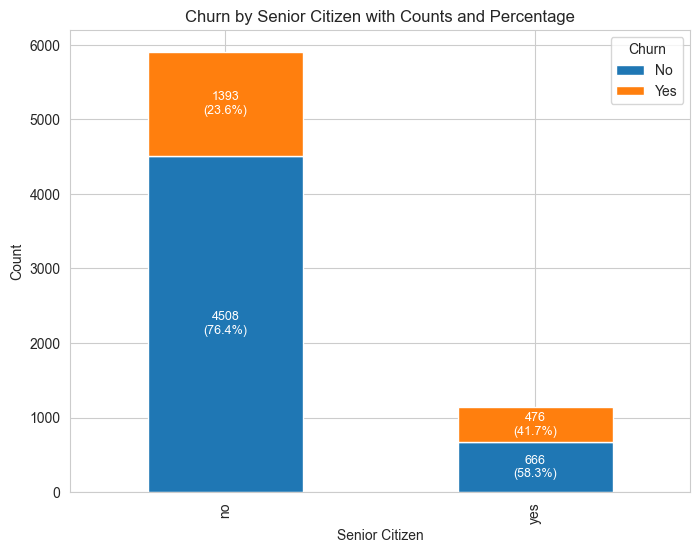

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Create crosstab for counts
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Calculate percentages for each group
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = ct.plot(kind='bar', stacked=True, figsize=(8,6))

# Add labels with counts and percentages
for i, senior_citizen in enumerate(ct.index):
    cum_height = 0
    for churn_status in ct.columns:
        count = ct.loc[senior_citizen, churn_status]
        percent = ct_percent.loc[senior_citizen, churn_status]
        if count > 0:
            ax.text(
                i,
                cum_height + count / 2,
                f'{count}\n({percent:.1f}%)',
                ha='center',
                va='center',
                color='white',
                fontsize=9
            )
        cum_height += count

plt.title('Churn by Senior Citizen with Counts and Percentage')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.show()


Text(0.5, 1.0, 'count of customer by Senior Citizen')

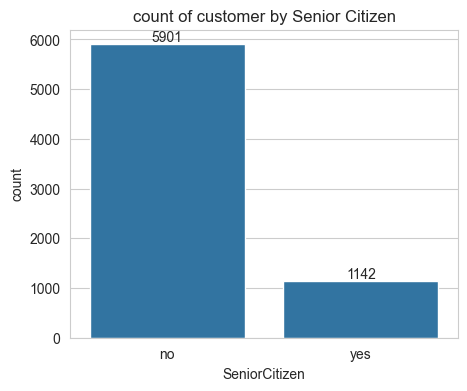

In [44]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x = "SeniorCitizen" , data = df)
ax.bar_label(ax.containers[0])
plt.title("count of customer by Senior Citizen")

# comparative a greater percentage of people n senior citizen having churned.

# based on tenure

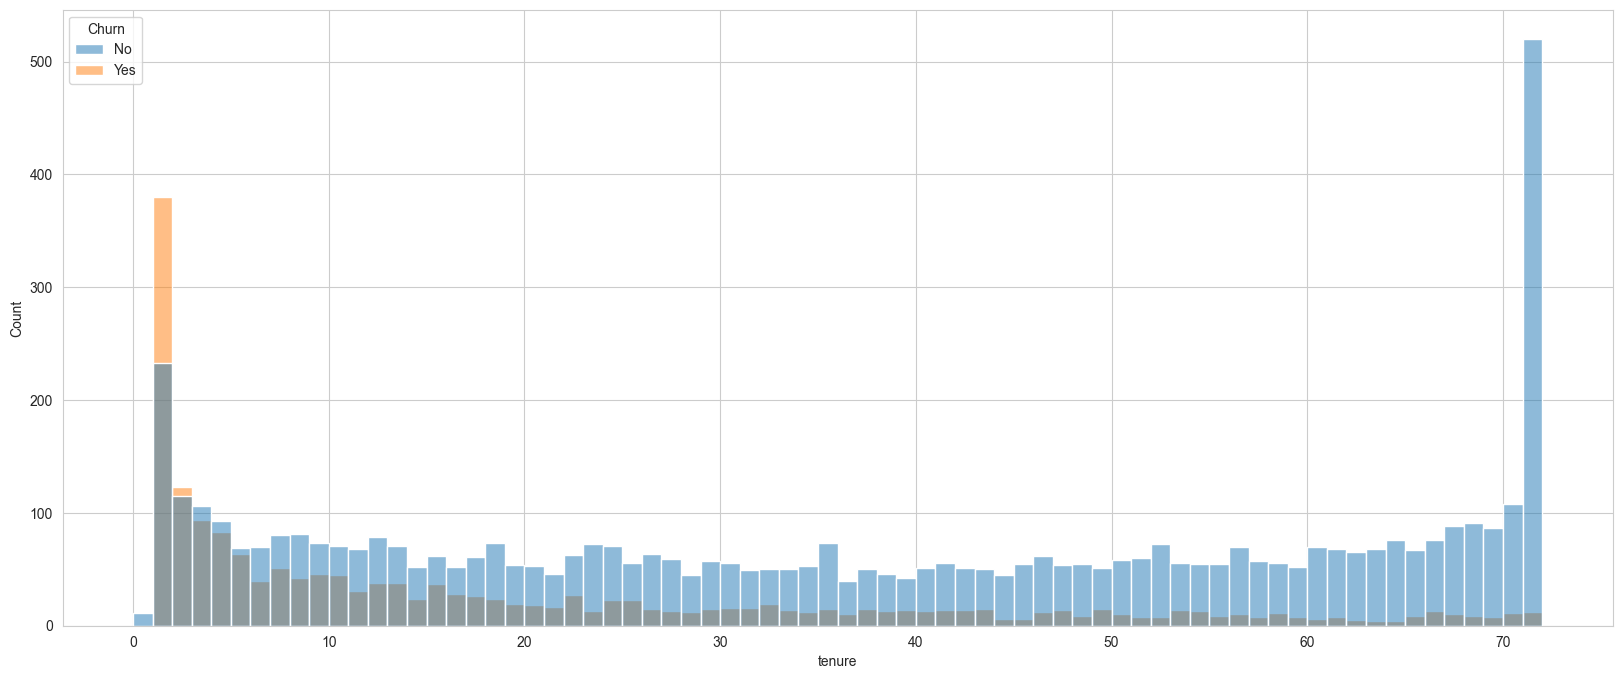

In [66]:
plt.figure(figsize=(20,8))
sns.histplot(x = "tenure" , data = df, bins = 72 , hue = "Churn")
plt.show()

# people who have used our services for a long time have stayed and people who have used our services # 1 or 2 months have churned

# count based on contract

Text(0.5, 1.0, 'count of customer by contract')

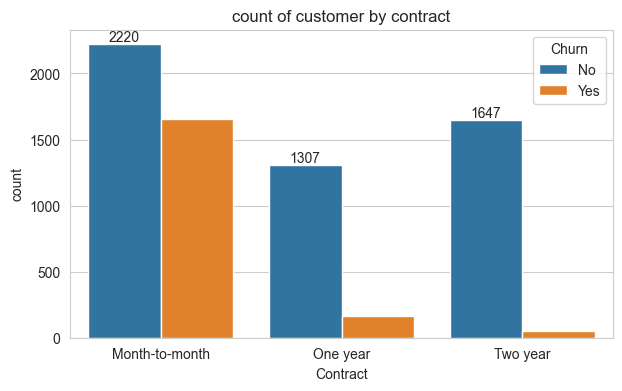

In [74]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x="Contract", data=df , hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("count of customer by contract")

# people who have month to month contract are likely to churn then from those who have 1 or 2 year of contracts.

In [78]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

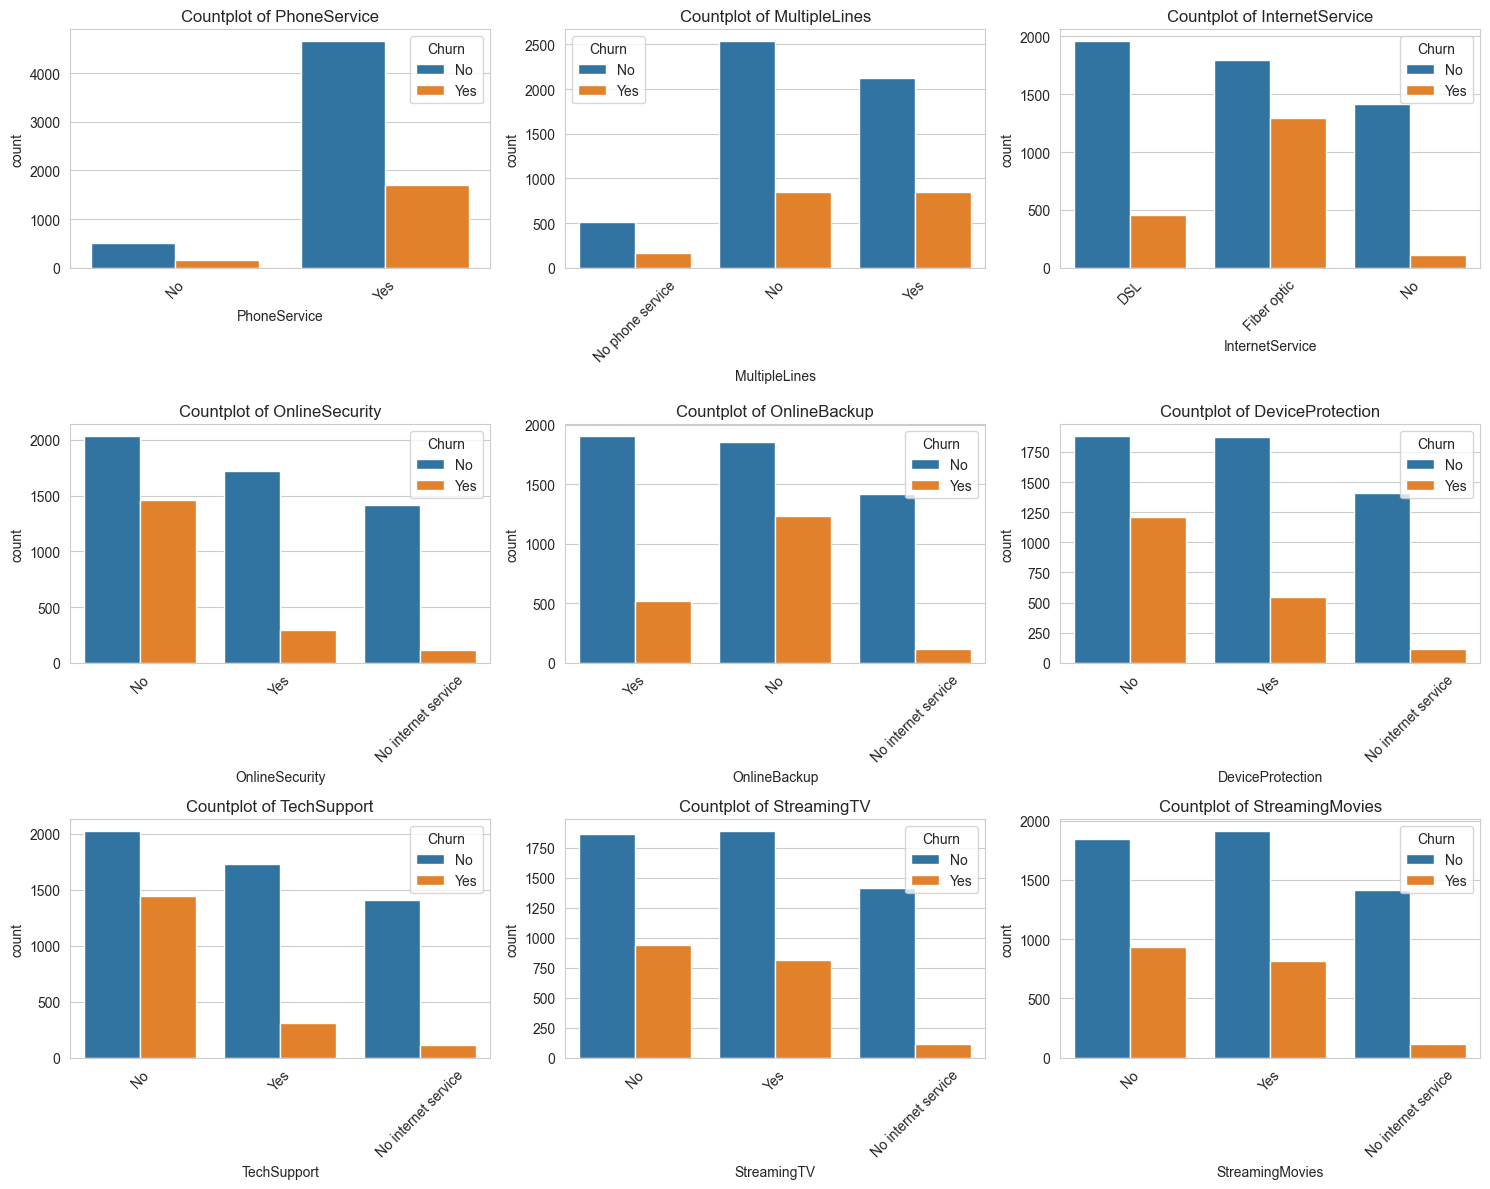

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Determine the number of rows and columns for subplots (e.g., 3x3)
n_rows = 3
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))

for i, col in enumerate(cols):
    r = i // n_cols
    c = i % n_cols
    sns.countplot(x=col, data=df, ax=axes[r, c], hue="Churn")
    axes[r, c].set_title(f'Countplot of {col}')
    axes[r, c].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


For every service feature (PhoneService, InternetService, OnlineSecurity, TechSupport, etc.), customers who do not churn consistently outnumber those who do.
	•	Lack of services like tech support, security, or phone service is associated with a higher churn rate among customers.
	•	Categories with “No internet service” or “No phone service” show very low counts and lower churn, indicating fewer customers in these segments.
	•	Streaming service availability (StreamingTV, StreamingMovies) also follows this pattern—active users are less likely to churn than inactive ones.

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

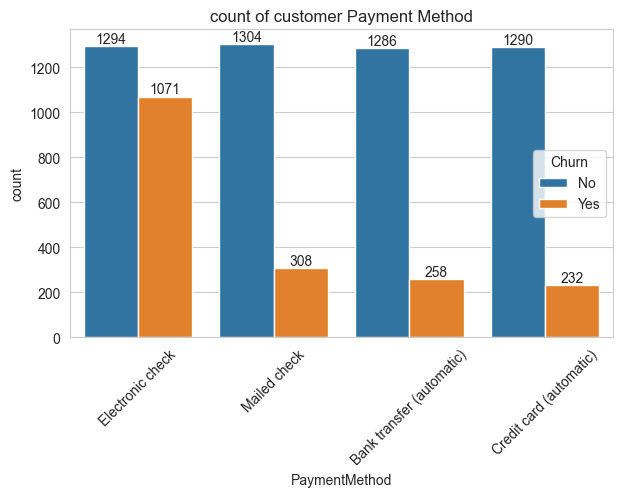

In [93]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x="PaymentMethod", data=df , hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("count of customer Payment Method")
plt.xticks(rotation=45)

# customer is likely to churn when he is using electronic check as a payment method.